<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчета--эффективности-обогащения" data-toc-modified-id="Проверка-расчета--эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка расчета  эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков-тестовой-выборки" data-toc-modified-id="Анализ-признаков-тестовой-выборки-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков тестовой выборки</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-распределения-размеров-гранул-сырья" data-toc-modified-id="Анализ-распределения-размеров-гранул-сырья-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ распределения размеров гранул сырья</a></span></li><li><span><a href="#Cуммарная-концентрация-всех-веществ" data-toc-modified-id="Cуммарная-концентрация-всех-веществ-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cуммарная концентрация всех веществ</a></span><ul class="toc-item"><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Корреляция признаков</a></span></li></ul></li><li><span><a href="#функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="функцию-для-вычисления-итоговой-sMAPE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>функцию для вычисления итоговой sMAPE</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
import numpy as np
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#from pandas_profiling import ProfileReport
#import pandas_profiling
#import sweetviz
#!pip install pandas_profiling

In [2]:
gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [8]:
display(gold_train.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

**Выводы:**
* данные загружены
* в тестовых данные отсутствуют многие столбцы
* тип данных во всех трех датасетах подходит для анализа

### Проверка расчета  эффективности обогащения


In [9]:
recovery = (gold_train['rougher.output.concentrate_au'] * (gold_train['rougher.input.feed_au']
                                                           - gold_train['rougher.output.tail_au']) / 
(gold_train['rougher.input.feed_au'] * (gold_train['rougher.output.concentrate_au'] - 
                                                         gold_train['rougher.output.tail_au'])) *100)
             

In [10]:
rougher_recovery = gold_train['rougher.output.recovery']
mae = mean_absolute_error(rougher_recovery, recovery)
print('MAE recovery:', mae)

MAE recovery: 9.682896147825551e-15


**Выводы:**
* проведен расчет эффективности обогащения руды
* расчет сверен с тем, что дан в таблице
* показатель MAE имеет очень низкое значение, из этого следует, что признаку rougher.output.recovery можно доверять

### Анализ признаков тестовой выборки

In [11]:
# проверка отсутствующих столбцов в тестовой выборке
set(gold_train.columns)-set(test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [12]:
# добавление в тестовую выборку столбцов с целевыми признаками
test_new = test.join(full_data.loc[test.index][['final.output.recovery','rougher.output.recovery']])
test_new.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.541216,87.107763
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,69.266198,86.843261
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.116445,86.842308
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,68.347543,87.226430
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,66.927016,86.688794


**Выводы:**
* в тестовой выборке остутствуют столбцы:
  * с показателями концентрации веществ на всех трех стадиях - 12 столбцов
  * с показателями веществ в отвальных хвостах на всех стадиях - 12 столбцов
  * с расчетными показателями веществ при флотации
  * с целевыми признаками
* добавлены целевые признаки в тестовую выборку

### Предобработка данных


In [13]:
gold_train = gold_train.drop_duplicates()
test_new = test_new.drop_duplicates()

In [14]:
test_new.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [15]:
test_new = test_new.fillna(method='ffill')

In [16]:
gold_train['rougher.output.recovery'].isna().sum()

0

**Выводы:**
* удалены дубликаты в тестовой и обучающей выборках
* в тестовой выборке заполнены отсутствующие значения предыдущими непропущенными значениями

###  Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [17]:
def summation_concentrate(row1, row2, row3, row4, title):
    '''расчет концентрацияя металлов на разных этапах очистки'''
    print(title)
    print('Концентрация', row1.sum(), 'rougher.input.feed') 
    print('Концентрация', row2.sum(), 'rougher.output')
    print('Концентрация', row3.sum(), 'primary_cleaner.output')
    print('Концентрация', row4.sum(), ' final.output')

In [18]:
summation_concentrate(gold_train['rougher.input.feed_ag'], 
                    gold_train['rougher.output.concentrate_ag'],
                    gold_train['primary_cleaner.output.concentrate_ag'],
                    gold_train['final.output.concentrate_ag'], '**Концентрация серебра**')

**Концентрация серебра**
Концентрация 121387.03283664072 rougher.input.feed
Концентрация 166615.96843582357 rougher.output
Концентрация 116034.75786878346 primary_cleaner.output
Концентрация 72749.49202790101  final.output


**Наибольшее значение серебро имеет в черновом концентрате после флотации. Наименьшее - в финальном концентрате.**

In [19]:
def plotting_concentrate(row1, row2, row3, row4, title):
    row1.plot.kde()
    row2.plot.kde()
    row3.plot.kde()
    row4.plot.kde()
    plt.legend(['rougher.input', 'rougher.output', 'primary_cleaner.output', 'final.output'])
    plt.xlabel('концентрация')
    plt.title(title)
    plt.ylabel('значения параметра')
    plt.show()

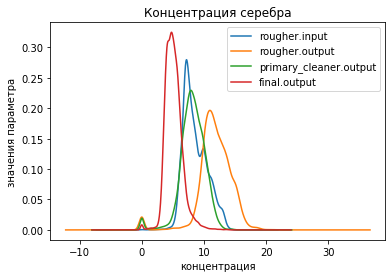

In [20]:
plotting_concentrate(gold_train['rougher.input.feed_ag'], 
                    gold_train['rougher.output.concentrate_ag'],
                    gold_train['primary_cleaner.output.concentrate_ag'],
                    gold_train['final.output.concentrate_ag'], 'Концентрация серебра')

In [21]:
summation_concentrate(gold_train['rougher.input.feed_au'], 
                    gold_train['rougher.output.concentrate_au'],
                    gold_train['primary_cleaner.output.concentrate_au'],
                    gold_train['final.output.concentrate_au'], '**Концентрация золота**')

**Концентрация золота**
Концентрация 111304.19573631769 rougher.input.feed
Концентрация 275055.9636399745 rougher.output
Концентрация 458241.3422582592 primary_cleaner.output
Концентрация 622609.6476463173  final.output


**Концентрация золота увеличивается с каждым этапом и имеет максимальное значение в финальном концентрате.**

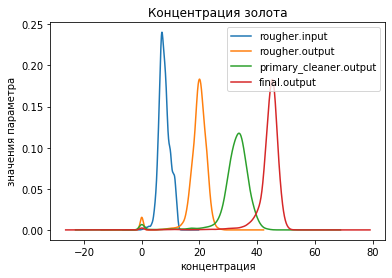

In [22]:
plotting_concentrate(gold_train['rougher.input.feed_au'], 
                    gold_train['rougher.output.concentrate_au'],
                    gold_train['primary_cleaner.output.concentrate_au'],
                    gold_train['final.output.concentrate_au'], 'Концентрация золота')

In [23]:
summation_concentrate(gold_train['rougher.input.feed_pb'], 
                    gold_train['rougher.output.concentrate_pb'],
                    gold_train['primary_cleaner.output.concentrate_pb'],
                    gold_train['final.output.concentrate_pb'], '**Концентрация свинца**')

**Концентрация свинца**
Концентрация 49491.50952515511 rougher.input.feed
Концентрация 108445.7851787124 rougher.output
Концентрация 134848.16585869133 primary_cleaner.output
Концентрация 143361.1133262377  final.output


**Концентрация свинца также увеличивается и достигает максимального значения в финальном концентрате.**

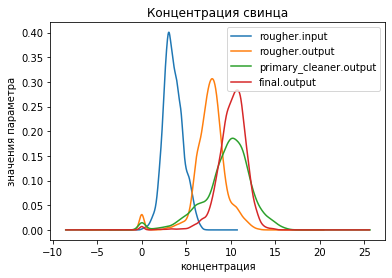

In [24]:
plotting_concentrate(gold_train['rougher.input.feed_pb'], 
                    gold_train['rougher.output.concentrate_pb'],
                    gold_train['primary_cleaner.output.concentrate_pb'],
                    gold_train['final.output.concentrate_pb'], 'Концентрация свинца')

**Выводы:**
* Из всех этапов в финальном концентрате серебра меньше всего.
* Золото и свинец увеличиваются с каждым этапом.

## Анализ данных

### Анализ распределения размеров гранул сырья


In [25]:
def plotting_size(row1, row2, title):
    row1.plot.hist(figsize=(10, 5), bins=30)
    row2.plot.hist(figsize=(10, 5), bins=30)
    plt.legend(['обучаюшая выборка', 'тестовая выборка'])
    plt.xlabel('Размер')
    plt.title(title)
    plt.ylabel('значения параметра')
    plt.show()

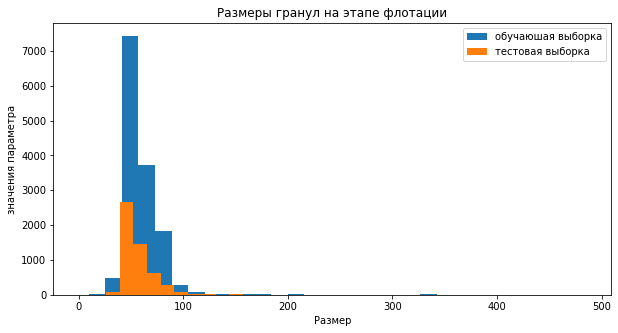

In [26]:
plotting_size(gold_train['rougher.input.feed_size'],
             test_new['rougher.input.feed_size'], 'Размеры гранул на этапе флотации')

Распределение размеров гранул в тестовой и обучающей выборках перед этапом флотации аналогично. 

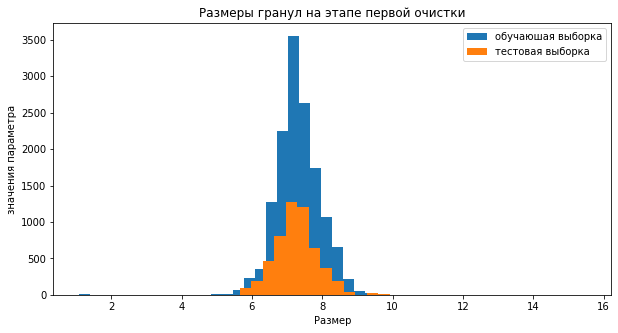

In [27]:
plotting_size(gold_train['primary_cleaner.input.feed_size'],
             test_new['primary_cleaner.input.feed_size'], 'Размеры гранул на этапе первой очистки')

Распределение размеров гранул перед этапом первичной очистки также совпадает в двух выборках. Размер гранул значительно уменьшился.

### Cуммарная концентрация всех веществ

In [28]:
def summation_concentrate_all(row1, row2, row3, row4):
    '''суммирование кнцентраций всех веществ'''
    total = (row1 + row2 + row3 + row4)
    print(total.sum())
    return total

In [29]:
#Концентрация веществ на этапе флотации
gold_train['rougher.output.concentrate_total'] = summation_concentrate_all(
                    gold_train['rougher.output.concentrate_au'], 
                    gold_train['rougher.output.concentrate_ag'],
                    gold_train['rougher.output.concentrate_sol'],
                    gold_train['rougher.output.concentrate_pb'])

949282.0760213444


In [30]:
# Концентрация веществ на первом этапе очистки
gold_train['primary_cleaner.output.concentrate_total'] = summation_concentrate_all(
                    gold_train['primary_cleaner.output.concentrate_au'], 
                    gold_train['primary_cleaner.output.concentrate_ag'],
                    gold_train['primary_cleaner.output.concentrate_sol'],
                    gold_train['primary_cleaner.output.concentrate_pb'])

836819.5640141512


In [31]:
# Концентрация веществ на финальном этапе
gold_train['final.output.concentrate_total'] = summation_concentrate_all(
                    gold_train['final.output.concentrate_au'], 
                    gold_train['final.output.concentrate_ag'],
                    gold_train['final.output.concentrate_sol'],
                    gold_train['final.output.concentrate_pb'])

954487.0322713754


In [32]:
concentrate_total = ['rougher.output.concentrate_total',
                     'primary_cleaner.output.concentrate_total',
                     'final.output.concentrate_total']

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


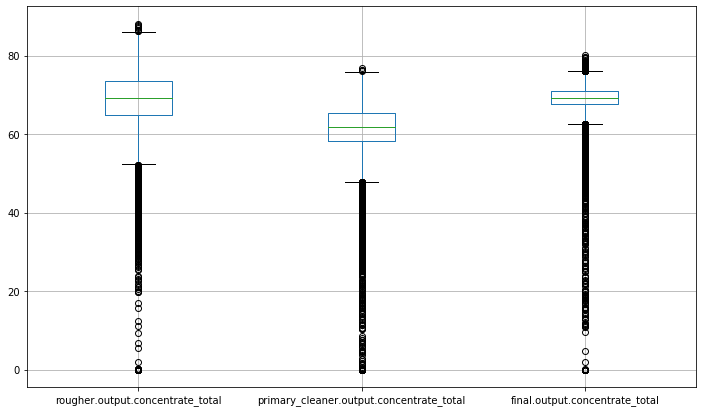

In [33]:
gold_train.boxplot(concentrate_total, figsize=(12,7))

**Суммарно концентрация всех веществ на первом этапом уменьшается, а к финальному увеличивается. Присутствуют выбросы в данных.

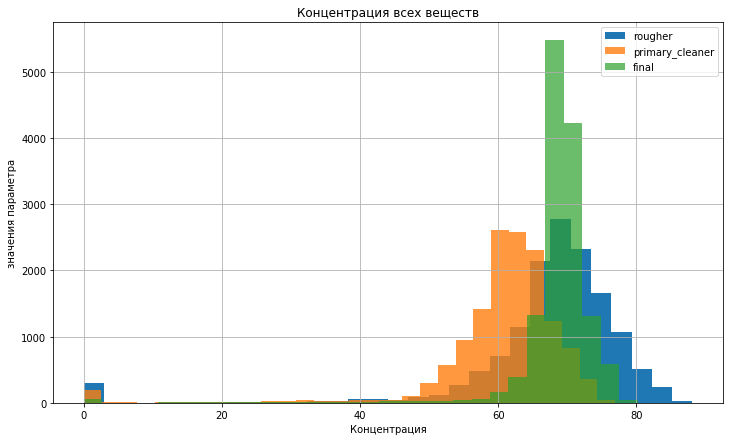

In [34]:
gold_train['rougher.output.concentrate_total'].plot.hist(figsize=(12, 7), bins=30, grid=True, alpha=1)
gold_train['primary_cleaner.output.concentrate_total'].plot.hist(figsize=(12, 7), bins=30, grid=True, alpha=0.8)
gold_train['final.output.concentrate_total'].plot.hist(figsize=(12, 7), bins=30, grid=True, alpha=0.7)
plt.legend(['rougher', 'primary_cleaner', 'final'])
plt.xlabel('Концентрация')
plt.title('Концентрация всех веществ')
plt.ylabel('значения параметра')
plt.show()

In [35]:
def dropping_outliers(df, row, num1, num2):
    df.drop(df[df[row] <= num1].index, inplace=True)
    df.drop(df[df[row] >= num2].index, inplace=True)
    return df

In [36]:
dropping_outliers(gold_train, 'rougher.output.concentrate_total', 55, 83)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,70.781325,59.001692,68.098589
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,70.539603,59.703912,68.274362
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,55.376330,59.561096,68.226068
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,69.201689,57.216686,68.200449


In [37]:
dropping_outliers(gold_train, 'primary_cleaner.output.concentrate_total', 49,76)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,66.424950,72.640924,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,67.012710,72.543485,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,65.752751,59.957723,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,70.781325,59.001692,68.098589
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,70.539603,59.703912,68.274362
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,55.376330,59.561096,68.226068
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,69.201689,57.216686,68.200449


In [38]:
dropping_outliers(gold_train, 'final.output.concentrate_total', 64, 75)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,66.103793,72.095042,64.311180
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,65.908382,71.321010,64.004667
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188,65.625127,72.072013,64.185763
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855,65.408849,71.887397,64.185200
10,2016-01-15 10:00:00,5.706261,10.242511,5.214161,43.487291,70.973641,10.473539,1.171183,17.717049,2.200997,...,-501.269181,10.043100,-498.529996,8.002633,-499.761922,14.004767,-599.595324,65.992853,72.254860,64.650224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,70.781325,59.001692,68.098589
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,70.539603,59.703912,68.274362
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,55.376330,59.561096,68.226068
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471,69.201689,57.216686,68.200449


Удаляем выбросы на каждом этапе.

In [39]:
display(gold_train.isna().sum().sum())

3319

In [40]:
gold_train = gold_train.fillna(method ='ffill') # заполняю нулямию Удаление приводит у ухудшению показателей

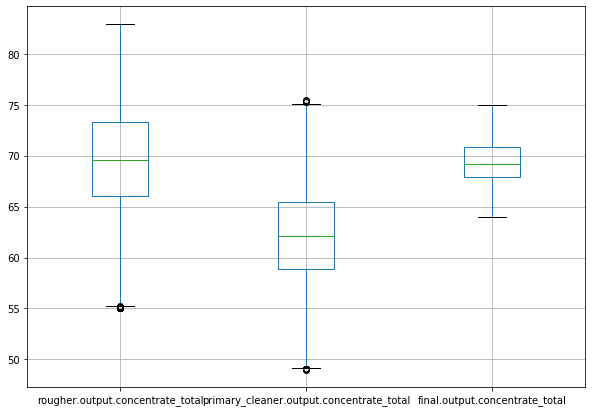

In [41]:
gold_train.boxplot(concentrate_total, figsize=(10,7))

#### Корреляция признаков

In [42]:
corr = gold_train.corr()
corr = corr.fillna(0)
display(corr)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
final.output.concentrate_ag,1.000000,-0.242698,0.356363,-0.720140,0.120081,0.306642,-0.147863,0.003272,0.208829,0.038933,...,0.004292,-0.012988,0.271737,-0.025480,0.251133,0.193418,0.047437,0.034318,0.104769,0.024340
final.output.concentrate_pb,-0.242698,1.000000,-0.331472,-0.313608,-0.114291,-0.226864,0.279682,0.012013,-0.014176,0.070492,...,0.061257,0.125595,-0.152048,0.172274,-0.172417,-0.043702,0.098240,-0.151287,-0.093644,-0.166248
final.output.concentrate_sol,0.356363,-0.331472,1.000000,-0.170133,0.217048,0.203386,0.092465,0.067978,0.203525,0.305064,...,0.160001,-0.071626,0.335322,-0.098170,0.333750,0.237974,-0.238757,0.284799,0.122531,0.825629
final.output.concentrate_au,-0.720140,-0.313608,-0.170133,1.000000,-0.023361,-0.130583,-0.010686,-0.022451,-0.152262,-0.064927,...,-0.024928,0.031764,-0.177632,0.016382,-0.145274,-0.207228,-0.102478,0.082198,-0.007684,0.248482
final.output.recovery,0.120081,-0.114291,0.217048,-0.023361,1.000000,0.196741,-0.224525,-0.126113,-0.513813,0.361875,...,-0.132084,0.091149,0.051311,0.060516,0.060424,-0.022316,-0.031229,-0.026365,0.204235,0.190262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank6_a_air,0.193418,-0.043702,0.237974,-0.207228,-0.022316,-0.130962,0.013142,0.007829,0.051730,-0.133954,...,0.264553,0.402114,0.519382,0.428895,0.514857,1.000000,0.140048,-0.064691,-0.229135,0.107257
secondary_cleaner.state.floatbank6_a_level,0.047437,0.098240,-0.238757,-0.102478,-0.031229,-0.134028,-0.097120,-0.078400,-0.060987,-0.122430,...,0.267867,0.026881,0.365338,0.010634,0.335912,0.140048,1.000000,-0.228176,-0.139137,-0.260631
rougher.output.concentrate_total,0.034318,-0.151287,0.284799,0.082198,-0.026365,0.181198,0.336701,-0.087877,0.359779,0.183288,...,-0.002687,-0.165688,-0.075032,-0.114340,-0.049062,-0.064691,-0.228176,1.000000,0.188240,0.293130
primary_cleaner.output.concentrate_total,0.104769,-0.093644,0.122531,-0.007684,0.204235,0.398056,-0.006618,0.245891,0.197176,0.372590,...,-0.226031,-0.331351,-0.080096,-0.300932,-0.092134,-0.229135,-0.139137,0.188240,1.000000,0.116959


In [43]:
#заполняю нулями значения меньше 0,7 для лучшей визуалзации на хитмэпе
for i in corr:
    for x in corr[i]:
        if x < 0.7:
            corr = corr.replace(x, 0)

In [44]:
#cols=[x for i,x in enumerate(corr.columns) if corr.iat[0,i]>=0.98]
#corr = corr.drop(cols, axis = 1)


sns.set(rc = {'figure.figsize':(45,35)})
#matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask = matrix)


In [45]:

matrix = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)) #создаем матрицу с верхним треугольником, приэтом занулив главную диагональ
matrix

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.concentrate_total,primary_cleaner.output.concentrate_total,final.output.concentrate_total
final.output.concentrate_ag,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
final.output.concentrate_pb,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
final.output.concentrate_sol,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.825629
final.output.concentrate_au,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
final.output.recovery,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank6_a_air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000
secondary_cleaner.state.floatbank6_a_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000
rougher.output.concentrate_total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
primary_cleaner.output.concentrate_total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [46]:

[column for column in matrix.columns if any(matrix[column] > 0.7)] #Получили коррелирующие столбцы;) 

['primary_cleaner.output.tail_pb',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_au',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_l

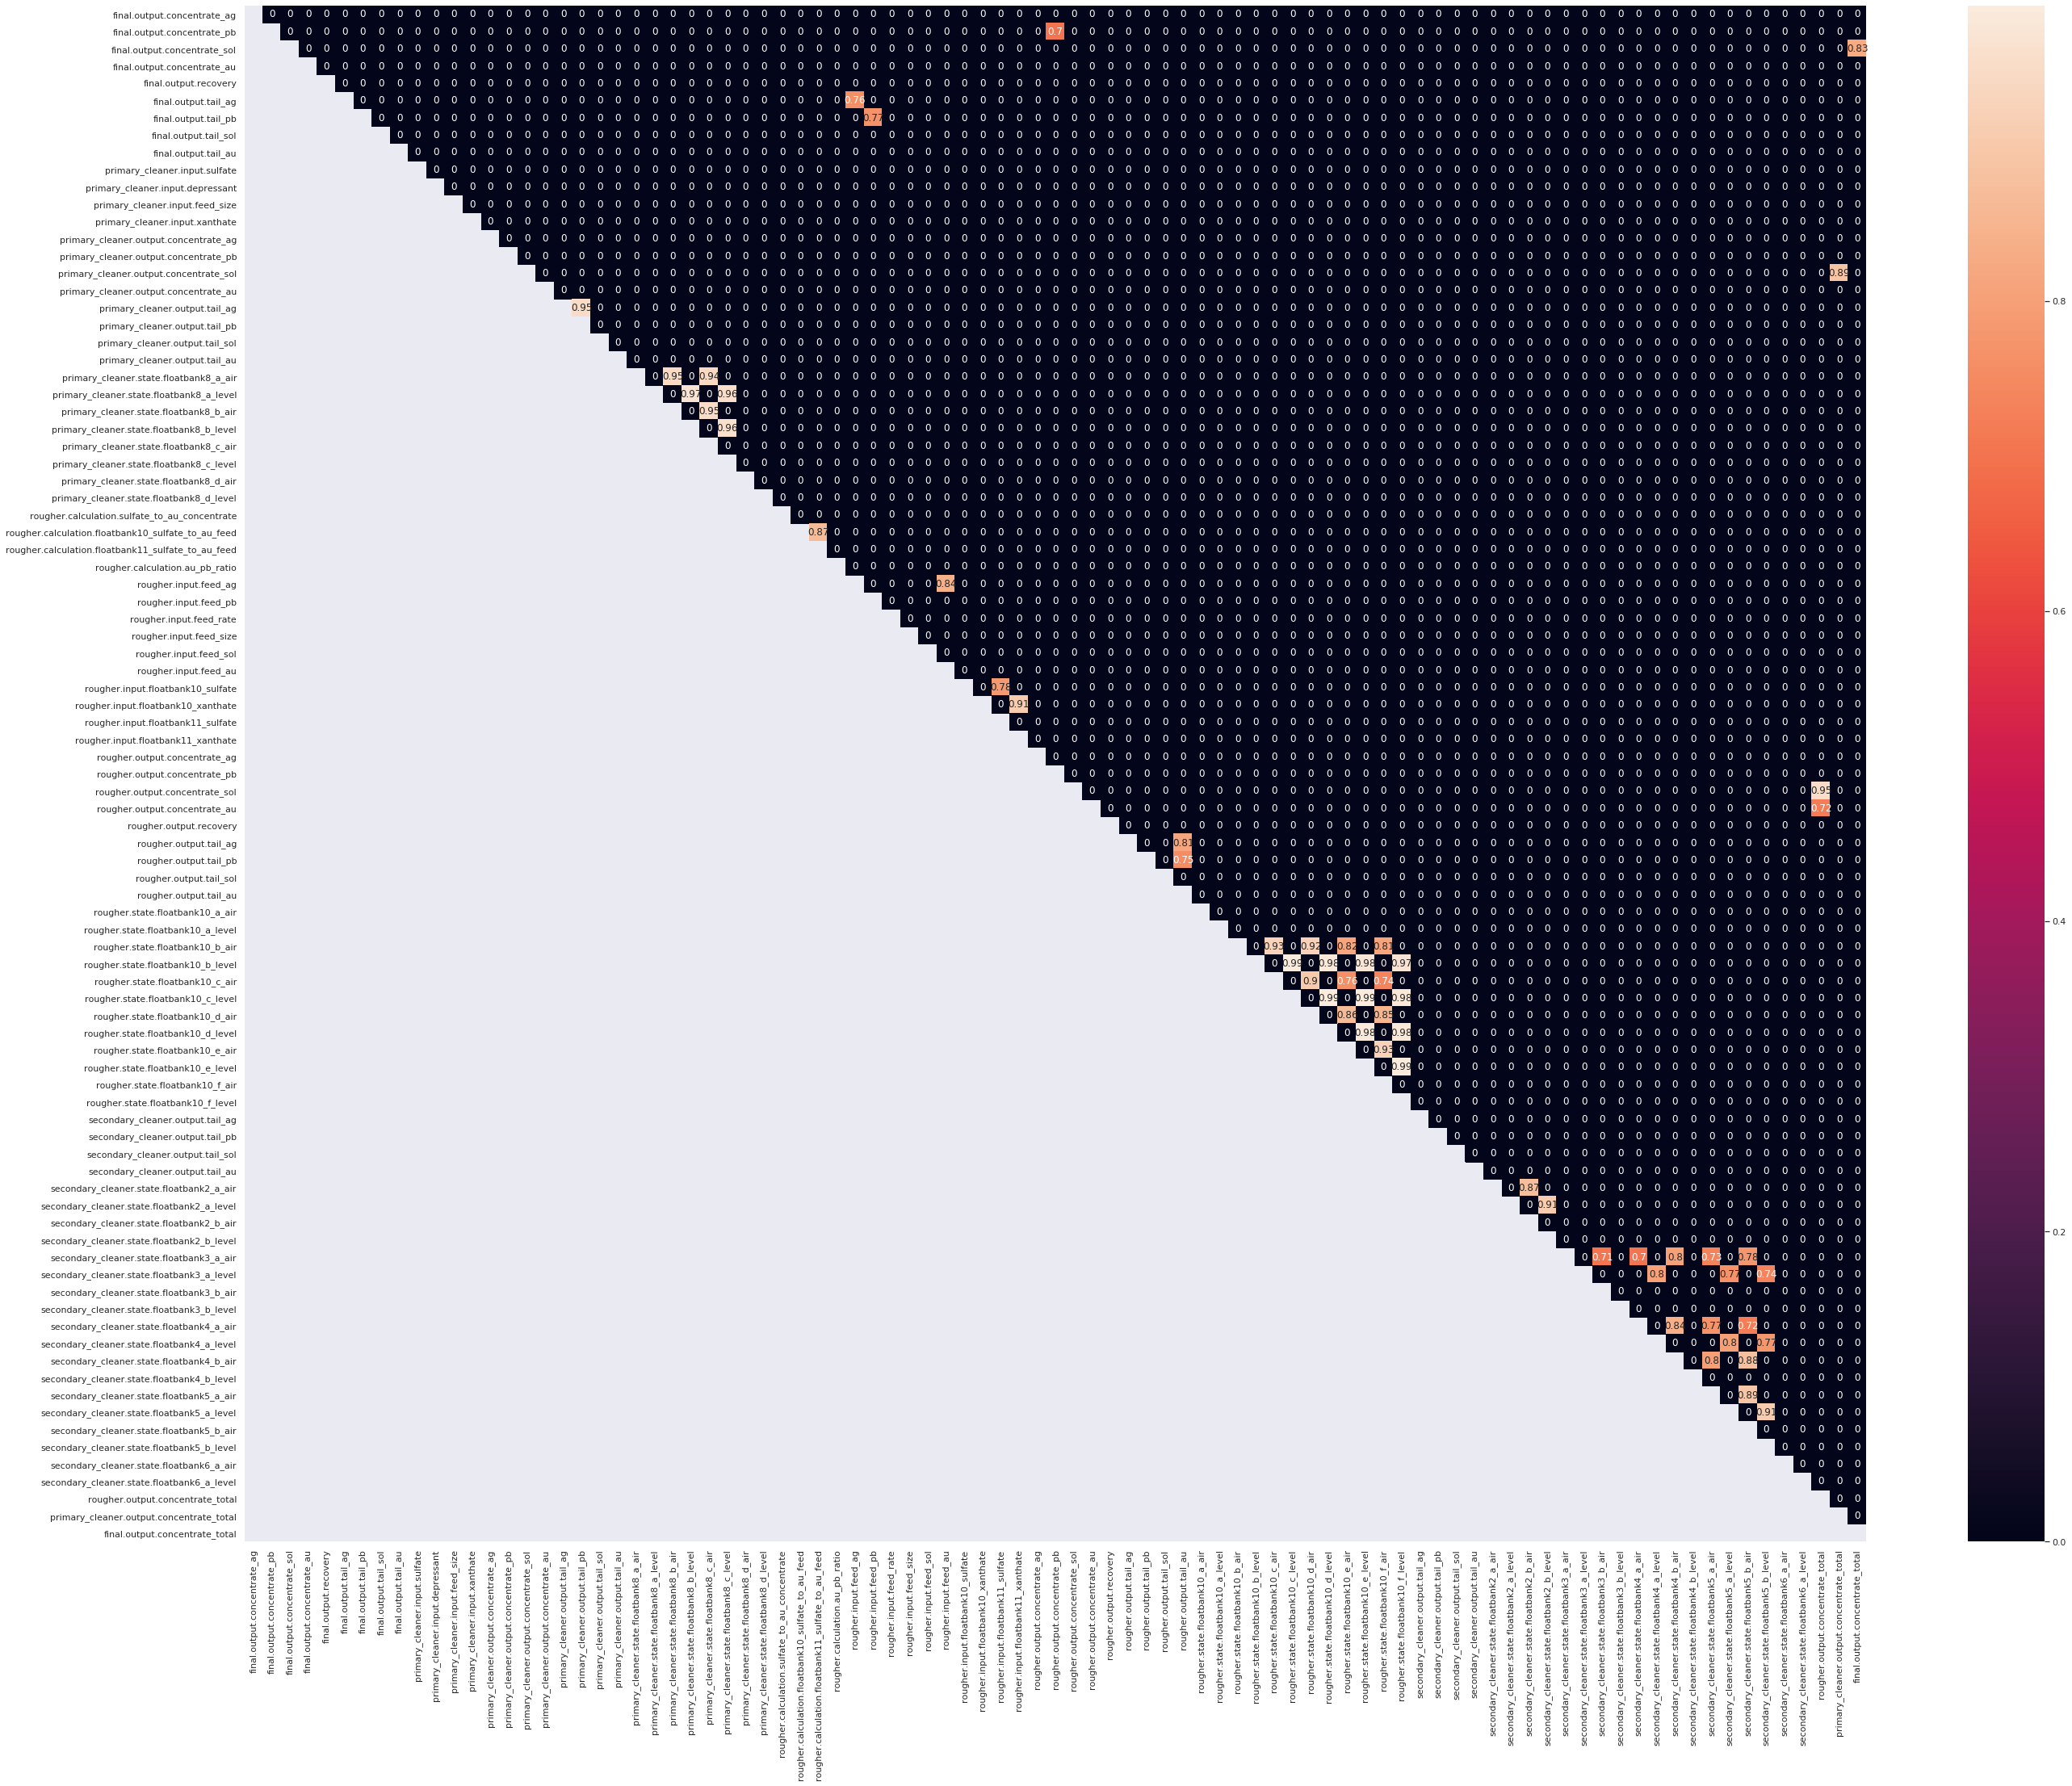

In [47]:
sns.set(rc = {'figure.figsize':(45,35)})
sns.heatmap(matrix, annot=True)

In [48]:
# в обучающей выборке оставляем только те столбцы, что есть в тестовой
gold_train = gold_train[test_new.columns]
print(gold_train.shape, test_new.shape)

(11317, 55) (5290, 55)


In [49]:
# делим на признаки и целевые признаки
features_train = gold_train.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_train_final = gold_train['final.output.recovery']
target_train_rougher = gold_train['rougher.output.recovery']

features_test = test_new.drop(['final.output.recovery', 'rougher.output.recovery', 'date'], axis=1)
target_test_final = test_new['final.output.recovery']
target_test_rouhger = test_new['rougher.output.recovery']

### функцию для вычисления итоговой sMAPE

In [50]:
def smape_score(target, predict):
    smape = ((1/len(target)) * (2*abs(target - predict)) / (abs(target) + abs(predict))).sum()
    return smape * 100


In [51]:
def smape_total(smape_rougher, smape_final):
    smape_general = (0.25 * smape_rougher) + (0.75 * smape_final)
    return smape_general

**Выводы:**
* распределение размеров гранул совпадает в двух выборках и этапах. 
* Размер гранул значительно уменьшился перед первичной очисткой.
* суммарная концентрация всех веществ с каждым этапом уменьшается. 
* удалены выбросы по концентрации всех веществ
* обнаружена значительная корреляция между признаками. Но данные признаки отсутствуют в тестовой выборке и не войдут в обучающую.
* из обучающей выборки удалены столбцы, отсутствующие в тестовой
* целевые признаки отделены от выборок
* написаны функции по расчету метрики качества модели

## Модель

### Линейная регрессия

In [52]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train_rougher)
predicted_rougher = model_lr.predict(features_test)


In [53]:
model_lr_final = LinearRegression()
model_lr_final.fit(features_train, target_train_final)
predicted_final = model_lr_final.predict(features_test)

In [54]:
smape_final = smape_score(target_test_final, predicted_final)
print('SMAPE линейной регрессии на финальной стадии: {:.3f}'.format(smape_final))

SMAPE линейной регрессии на финальной стадии: 12.821


In [55]:
smape_rougher = smape_score(target_test_rouhger, predicted_rougher)
print('SMAPE линейной регрессии на стадии флотации: {:.3f}'.format(smape_rougher))

SMAPE линейной регрессии на стадии флотации: 13.128


In [56]:
smape_lr = smape_total(smape_rougher, smape_final)
print('Итоговое SMAPE линейной регрессии: {:.3f}'.format(smape_lr))

Итоговое SMAPE линейной регрессии: 12.897


### Случайный лес

In [57]:
#КОД РЕВЬЮЕРА
score = make_scorer(smape_score, greater_is_better=False)#Нам необходимо минимизировать smape, поэтому False.

param_grid =  {'max_depth': range(3, 7, 2),
              'n_estimators': range(80, 100, 10)}

model_forest = GridSearchCV(RandomForestRegressor(random_state=12345), param_grid=param_grid, 
                            cv = 5, n_jobs = -1, scoring=score)
model_forest.fit(features_train, target_train_rougher)
predicted_forest1 = model_forest.predict(features_test)

In [58]:
smape_rouhger3 = smape_score(target_test_rouhger, predicted_forest1)
print('SMAPE случайного леса на стадии флотации: {:.3f}'.format(smape_rouhger3))

SMAPE случайного леса на стадии флотации: 13.022


In [59]:
%%time
param_grid =  {'max_depth': range(3, 7, 2),
              'n_estimators': range(80, 100, 10)}

model_forest = GridSearchCV(RandomForestRegressor(random_state=12345), param_grid=param_grid, 
                            cv = 5, n_jobs = -1)
#model = GridSearchCV(estimator = clf, param_grid=param_grid,
                               #cv = 4, n_jobs = -1)
model_forest.fit(features_train, target_train_rougher)
predicted_forest = model_forest.predict(features_test)

CPU times: user 3min 27s, sys: 120 ms, total: 3min 27s
Wall time: 3min 28s


In [60]:
smape_rouhger2 = smape_score(target_test_rouhger, predicted_forest)
print('SMAPE случайного леса на стадии флотации: {:.3f}'.format(smape_rouhger2))

SMAPE случайного леса на стадии флотации: 13.022


In [61]:
model_forest.best_params_

{'max_depth': 5, 'n_estimators': 90}

In [62]:
%%time
param_grid =  {'max_depth': range(3, 7, 2),
              'n_estimators': range(70, 90, 10)}

model_forest_final = GridSearchCV(RandomForestRegressor(random_state=12345), param_grid=param_grid, 
                            cv = 5, n_jobs = -1)
#model = GridSearchCV(estimator = clf, param_grid=param_grid,
                               #cv = 4, n_jobs = -1)
model_forest_final.fit(features_train,target_train_final)

predicted_forest_final = model_forest_final.predict(features_test)

CPU times: user 3min 1s, sys: 215 ms, total: 3min 2s
Wall time: 3min 2s


In [63]:
smape_final2 = smape_score(target_test_final, predicted_forest_final)
print('SMAPE случайного леса на финальной стадии: {:.3f}'.format(smape_final2))

SMAPE случайного леса на финальной стадии: 12.028


In [64]:
smape_rf = smape_total(smape_rouhger2, smape_final2)
print('Итоговое SMAPE случайного леса: {:.3f}'.format(smape_rf))

Итоговое SMAPE случайного леса: 12.276


In [65]:
model_forest_final.best_params_

{'max_depth': 3, 'n_estimators': 70}

**Выводы:**
Модель случайного леса показала лучший результат метрики оценки качества SMAPE.

ВЫВОДЫ:
* данные загружены
* в тестовых данные отсутствуют многие столбцы
* тип данных во всех трех датасетах подходит для анализа
* расчет эффективности обогащения руды проверен и подтвержден
* в тестовой выборке остутствуют некоторые столбцы, включая целевые признаки.
* добавлены целевые признаки в тестовую выборку
* удалены дубликаты в тестовой и обучающей выборках
* в тестовой выборке заполнены отсутствующие значения предыдущими непропущенными значениями
* Концентрация золота и свинца наибольшая в финальном концентрате, а вот серебро имеет самы низкий уровень.
* Распределение размеров гранул совпадает в двух выборках и на двух этапах. Размер гранул значительно уменьшился.
* суммарная концентрация всех веществ с каждым этапом уменьшается. 
* удалены выбросы по концентрации всех веществ
* из обучающей выборки удалены столбцы, отсутствующие в тестовой
* целевые признаки отделены от выборок
* написаны функции по расчету метрики качества модели